<h1>
Gender-Based Violence Tweet Classification by ZindiWeekendz<h1><h2> solution by  XVIII_6 @zindi<h2>






# [![Gender-Based Violence](https://www.intrahealth.or.tz/sites/ihweb/files/vital-images/gender_purple_620_280_0.png)](https://zindi.africa/hackathons/gender-based-violence-tweet-classification/leaderboard)





<h5>SAY NO TO THE GENDER BASED VIOLANCE <h5>

<h2>PROBLEM STATEMENT <h2>
<h4>Gender-based violence, or GBV, is an ongoing and ever-resent scourge around the world, and is particularly prevalent in developing and least-developed countries. Gender-based violence also increased in many parts of the world during the COVID-19 pandemic.

One of the greatest challenges in combating GBV is the ‘culture of silence’, where victims of violence are scared, ashamed or intimidated to discuss their experiences with others and often do not report their experiences to authorities.

Another challenge faced by victims is achieving justice for their abusers. Some may not be aware of support systems, or not know where and how to report the perpetrators.

Victims may find and safety sharing their experiences online (as evidenced by the #MeToo movement), allowing them to get more support in an anonymous and/or safe way.<h4>


<h2>OBJECTIVE OF THE HACKATHON<h2>
<h4>The objective of this challenge is create a machine learning algorithm that classifies tweets about GBV into one of five categories: sexual violence, emotional violence, harmful traditional practices, physical violence and economic violence.<h4>

<h4>MOUNTING THE DRIVE AND INSTALL THE IMPORTANT PACKAGES<h4>

In [1]:
# mounting google drive for getting the data from google drive 
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#install the fastai and torch_nightly
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai #a free library for deep learning that build in top of the pytorch for building the language model for classification 


Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html


<h4>IMPORTANT THE LIBRARY<h4>


In [3]:
#importating the fastai and associated 
import fastai
from fastai.text import *
from fastai import *
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [4]:
 #building the function to set the seed value and cuda for either cpu or gpu environment 
 def random_seed(seed_value,use_cuda): 
    np.random.seed(seed_value)
 #for cpu  environment 
    torch.manual_seed(seed_value) 
    random.seed(seed_value)
    if use_cuda: 
        torch.cuda.manual_seed(seed_value) 
        torch.cuda.manual_seed_all(seed_value) 
# for gpu  environment 
        torch.backends.cudnn.deterministic = True 
        torch.backends.cudnn.benchmark = False 

In [5]:
#calling the function and set the seed value to 2021 and use cuda for running environment 
random_seed(2021,True)
torch.cuda.is_available() #check if cude is available so as to be used 

True

<h4>LOADING THE DATA SET<h4>

In [6]:
#loading the data and store in the variable for building the language model 
train = pd.read_csv("/content/drive/MyDrive/Hackathon/Train.csv") #loading the train data
test = pd.read_csv("/content/drive/MyDrive/Hackathon/Test.csv") #loading the test data 
ss =   pd.read_csv("/content/drive/MyDrive/Hackathon/Sample_submission.csv") #loading the sample sub 

<h4>DATA EXPLORATORY<h4>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


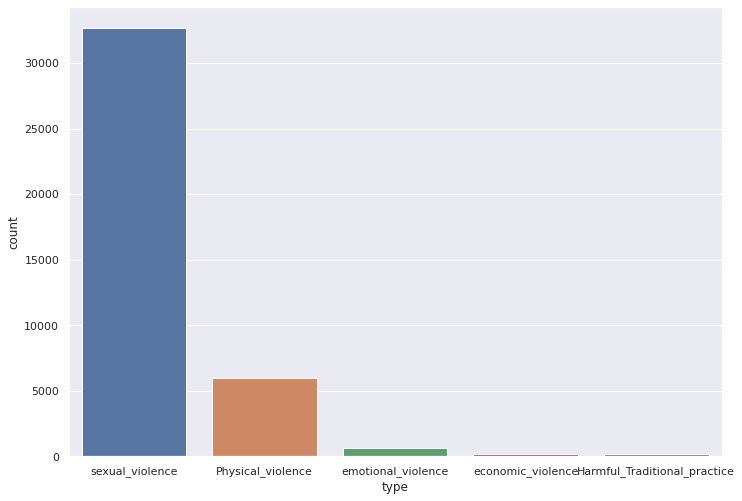

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(train["type"])

In [8]:
train.head()#checking the  five rows of the train data 

,Tweet_ID,tweet,type
0,ID_PEHUUQ78,"Well, being the COMPLETE parasite that he is.....",sexual_violence
1,ID_9Q6MDMHE,I can't express how sad it makes me that there...,sexual_violence
2,ID_EXCD50LB,"Dom raped the girl, David enabled it. By provi...",sexual_violence
3,ID_11MA23BO,One prosecutor Magistrates courts at the Teddy...,sexual_violence
4,ID_NHLRFWH4,Then she told me 2 drinks in she was barred ou...,sexual_violence


In [9]:
test.head() #checking the five rows of the test data 

,Tweet_ID,tweet
0,ID_D9ONL553,What is now left for us as Nigerians? In the s...
1,ID_263YTILY,She insulted me.... in public!
2,ID_62VS6IXC,"When I was 20, a man choked me in public after..."
3,ID_OG50429Q,I was leaving my husband &amp; he forced me to...
4,ID_VNQO3TJG,"”I care about you, want you part of my life,” ..."


In [10]:
train.info() #checking the information example data type  about the train 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  39650 non-null  object
 1   tweet     39650 non-null  object
 2   type      39650 non-null  object
dtypes: object(3)
memory usage: 929.4+ KB


In [11]:
test.info() #checking the information example data type about the test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15581 entries, 0 to 15580
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  15581 non-null  object
 1   tweet     15581 non-null  object
dtypes: object(2)
memory usage: 243.6+ KB


In [12]:
train.isnull().sum() #checking the null values in the train data 

Tweet_ID    0
tweet       0
type        0
dtype: int64

In [13]:
test.isnull().sum() #checking the null values in the test data 

Tweet_ID    0
tweet       0
dtype: int64

In [14]:
train.shape,test.shape,ss.shape #checking the shape for the train,test and sample submission 

((39650, 3), (15581, 2), (15581, 2))

In [15]:
#concatenate the train and test data set and droping the type column 
total_data= train.drop("type", axis=1).append(test, ignore_index = True)

In [16]:
total_data 

,Tweet_ID,tweet
0,ID_PEHUUQ78,"Well, being the COMPLETE parasite that he is....."
1,ID_9Q6MDMHE,I can't express how sad it makes me that there...
2,ID_EXCD50LB,"Dom raped the girl, David enabled it. By provi..."
3,ID_11MA23BO,One prosecutor Magistrates courts at the Teddy...
4,ID_NHLRFWH4,Then she told me 2 drinks in she was barred ou...
...,...,...
55226,ID_KKJHAE7H,"they say he stabbed me with my knife, bitch I ..."
55227,ID_R99YI7JA,"""That wasn't rape,"" he ""I just forced her to h..."
55228,ID_C618F2JR,How can girls and women self identify out of F...
55229,ID_QYEF0CID,Why do BLM not shout about FGM or forced child...


In [17]:
#spliting the data for training and testing 
data_train,data_validation= train_test_split(total_data, test_size = 0.25)

In [18]:
#creates a data bunch for language modelling.
#labels  here are completely ignored,therefore Instead, data is processed so that the RNN can learn what word comes next given a starting word.
data_lm = fastai.text.TextLMDataBunch.from_df(train_df = total_data, valid_df = data_validation, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [19]:
# Create and Train the Language Model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=True, metrics=[accuracy, Perplexity()])
#data_lm    is the language model data bunch
#AWD-LSTM   is the model architecture
#drop_multi is the drop-out.

In [20]:
learn.model #checking the language model 

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(24072, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(24072, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=24072, bias=True)
    (output_dp): RNNDropout()
  )
)

In [21]:
#print out a sample of the batch
data_lm.show_batch()

idx,text
0,"core of who we are . xxmaj an elderly friend was wrapped in barbed wire while xxmaj xxunk raped his wife . xxmaj no reminder of who he 's been his whole life breaks the xxmaj trump brainwashing . xxbos xxmaj dom raped the girl , xxmaj david enabled it . xxmaj by providing alcohol and manipulating the girls into acting up for the video . xxmaj he ’s done"
1,"a ditch . xxmaj told me i would be raped . xxmaj he said a lot of terrible things . xxmaj he would xxup gps track my phone , then still accuse me of not being where i said was . xxmaj he would take my phone away , then show up at my friends houses that i was n’t even at ( after i told him xxbos i remember"
2,", and all of the rape cases were reported ? dumbass xxbos xxmaj bhai xxunk sa xxunk tha xxunk ap mujy nhi to main bta xxunk ho ... xxmaj xxunk ka tickets sell krta tha ... i am i am wrong tell me ... xxmaj xxunk raped xxunk before marriage because he had gang 's if i am wrong kindly correct me ... xxbos and in the middle of our"
3,statement got me looking dead at everybody no need to side eye . 🙂 xxmaj like you said “ did he have his day in court ” ? xxbos xxmaj out . xxmaj he knew i was gay one day when i 'd come from visiting a friend of mine who stayed in rongai he raped me . xxmaj he pinned me on the bed and raped me i kept
4,", forced me to abort : xxmaj actress on xxmaj mithun 's son -via xxbos xxup tw / / here ’s his friend / bandmate on xxup ig telling me he does n’t care if if i was raped 🤍 he clearly hangs around similar wonderful people xxbos xxmaj this comment makes me sick . xxmaj so you think because of a way you dress means you should be raped"


epoch,train_loss,valid_loss,accuracy,perplexity,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 2.09E-02


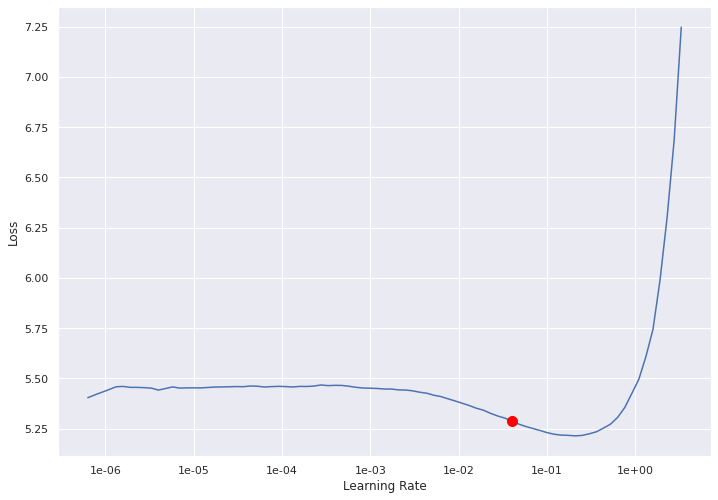

In [22]:
#finding  the optimal learning rate to train a  language model on
learn.lr_find() #lr_find() is a built in fast.ai function that runs a few epochs on the model to plot loss, and then calculate the minimum gradient.
learn.recorder.plot(suggestion = True)

In [23]:
#printing the minimum gradient obtained 
min_grad_lr = learn.recorder.min_grad_lr
print(min_grad_lr) 

0.03981071705534969


In [24]:
#use this learning rate to train the language model
learn.fit_one_cycle(5, min_grad_lr, moms = (0.85, 0.75))


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.355613,4.053510,0.272715,57.599312,01:25
1,4.392520,4.005655,0.275561,54.907742,01:25
2,4.199090,3.779225,0.294489,43.782112,01:25
3,3.918847,3.524013,0.319950,33.920269,01:25
4,3.683576,3.448212,0.328278,31.444101,01:25


In [25]:
#save and encode the language model trainings 
learn.save_encoder('/content/drive/MyDrive/Hackathon/#2 GBV classifier/save')

In [26]:
#loading the train and the test ready to be trained by the language model 
train_new = pd.read_csv("/content/drive/MyDrive/Hackathon/Train.csv")
test_new = pd.read_csv("/content/drive/MyDrive/Hackathon/Test.csv")

<h4>FEATURE ENGINEERING<h4>

In [27]:
#claening the data by droping the tweet_ID 
train_new = train_new.drop("Tweet_ID", axis=1) #drop tweet_id in train data 
test_new = test_new.drop("Tweet_ID", axis=1)  #drop tweet_id in the test data
tweet = train_new["tweet"] #save the tweet column to tweet 
train_new = train_new.drop("tweet", axis=1) #droping the tweet  in train 
train_new["text"] = tweet 
tweet = test_new["tweet"]# save the tweet column to tweet 
test_new = test_new.drop("tweet", axis=1) #droping the tweet in test 
test_new["text"] = tweet

In [28]:
train_new.head() #Exploring the train new data 

,type,text
0,sexual_violence,"Well, being the COMPLETE parasite that he is....."
1,sexual_violence,I can't express how sad it makes me that there...
2,sexual_violence,"Dom raped the girl, David enabled it. By provi..."
3,sexual_violence,One prosecutor Magistrates courts at the Teddy...
4,sexual_violence,Then she told me 2 drinks in she was barred ou...


In [29]:
test_new.head() #Exploring the test new data 

,text
0,What is now left for us as Nigerians? In the s...
1,She insulted me.... in public!
2,"When I was 20, a man choked me in public after..."
3,I was leaving my husband &amp; he forced me to...
4,"”I care about you, want you part of my life,” ..."


In [30]:
##spliting the data for training and testing 
data_train, data_validation = train_test_split(train_new, stratify =train_new["type"],test_size = 0.25)

In [31]:
# creating the text_classifier_learner 
#with the data_clas DataBunch and the AWD_LSTM architecture
data_clas =  TextClasDataBunch.from_df("",data_train,valid_df=data_validation,vocab= data_lm.train_ds.vocab,bs = 35,test_df=test_new,text_cols=['text'],label_cols=['type'])
#TextClasDataBunch sets up the data for classification

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [32]:
#loading the learner in classifier 
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('/content/drive/MyDrive/Hackathon/#2 GBV classifier/save')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (29737 items)
x: TextList
xxbos xxmaj he raped me for four days in a row . 🔴 so sad story 🔴,xxbos xxmaj first that man drugged and raped me and laughed that all xxmaj muslim women deserve to be raped then threatened me that he will do a xxmaj xxunk case as he has connections and white privilege,xxbos xxmaj eric is in debt to me bc i ’ve saved him from sexual predators while he was drunk 2 times and he says he ’s glad he did n’t have to experience getting raped again,xxbos .. to get married soon ? xxmaj what will you tell if i come home saying my husband beats me frequently ? xxmaj he had no answer but instead xxunk her ..,xxbos a woman once told a frnd of mine w / so much pride , " xxmaj fred , my husband slaps me , sometimes , beats me w / a belt to correct my head " . * shock * "
y: CategoryList
sexual_violence,sexual_violence,sexual_violence,Physical_violence,Physical_violence
Path: .;

Valid: LabelList (9913 items)
x: TextList
xx

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-03
Min loss divided by 10: 4.37E-02
0.0030199517204020187


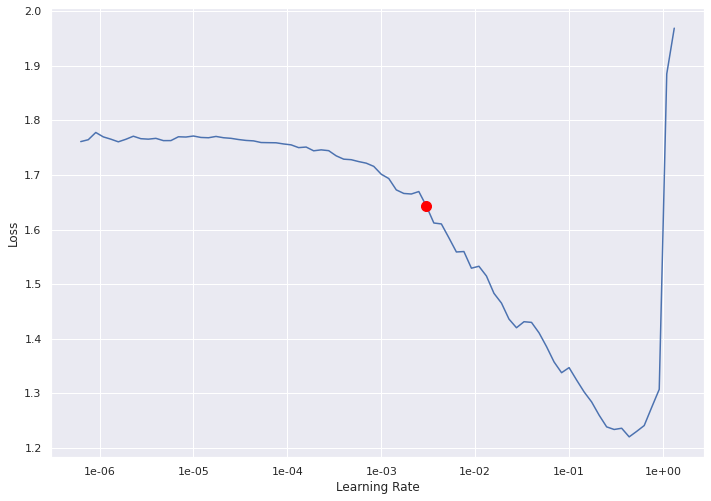

In [33]:
#finding  the optimal learning rate to train
learn.lr_find()
learn.recorder.plot(suggestion = True)
min_grad_lr = learn.recorder.min_grad_lr
print(min_grad_lr) #printing the minimum gradient obtained 

In [34]:
##use this learning rate to train
learn.fit_one_cycle(2, min_grad_lr, moms = (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.186849,0.070902,0.976395,00:33
1,0.148581,0.057338,0.981237,00:34


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

In [35]:
#freezing the learner  in epoch in one cycle by the different learning rate 
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4), 1e-2), moms= (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.022518,0.005883,0.997781,00:36


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [36]:
#again freezing the learner in another  epoch by the different learning rate 
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4), 1e-3), moms= (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.008089,0.005274,0.998083,00:52


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [37]:
#unfreezing all layers and train the model at a low learning rate.
learn.unfreeze()
learn.fit_one_cycle(3, slice(5e-3/(2.6**4), 5e-3), moms= (0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.009092,0.004203,0.998890,01:07
1,0.006484,0.003407,0.999092,01:14
2,0.004436,0.006046,0.998588,01:12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ar

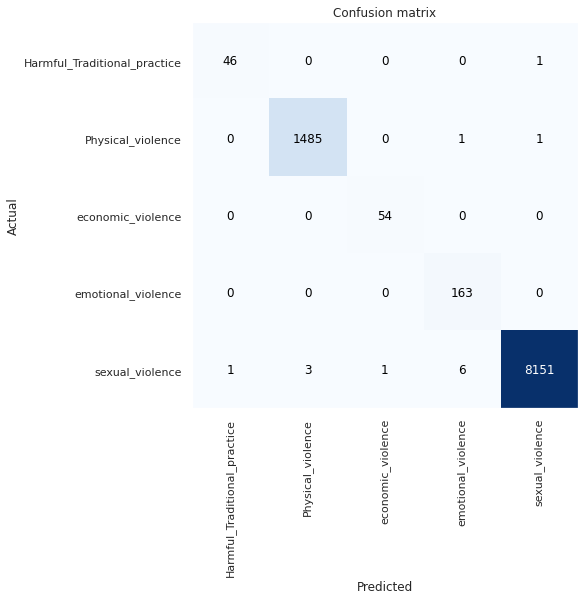

In [38]:
#ploting  the confusion matrix for our predictions on the test set
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn,preds,y,losses)
interp.plot_confusion_matrix()

In [39]:
#making predictions on the test data 
preds=learn.get_preds(DatasetType.Test, ordered=True)

In [40]:
#There are classes with the high probability,hence predictions 
class_indexes = np.argmax(preds[0],axis=1)
classes = [data_clas.classes[idx] for idx in class_indexes]
classes[:3]

['sexual_violence', 'emotional_violence', 'emotional_violence']

In [41]:
learn.show_results() #show the result of the learner 

text,target,prediction
"xxbos xxup language xxup are ( i xxup gonna xxup take xxup him xxup home xxup and xxup sit xxup on xxup him ) , xxup am xxup other xxup one i xxup ve xxup seen xxup what xxup am xxup going xxup to xxup do ) xxup doing xxup people xxup means xxup mess xxup there xxup life xxup up ( xxup tupac xxup said xxup y'all xxup do",sexual_violence,sexual_violence
"xxbos 🚩 xxup his xxup next xxup victim : xxup thru xxup fb , i xxup found xxup lady xxup who xxup dated xxup him , xxup only 1 xxup time . xxup same xxup week , xxup he xxup raped xxup my xxup daughter xxup he xxup was xxup calling xxup her xxup up xxup to 10 xxup times xxup daily , xxup desperate 2 xxup go xxup on",sexual_violence,sexual_violence
"xxbos xxup let xxup me xxup get xxup this xxup straight , xxup trump xxup is xxup being xxup sued xxup again xxup by a xxup woman xxup who xxup says xxup he xxup raped xxup her xxup and xxup he xxup credibility xxup is xxup very xxup good xxup and xxup the xxup pres . xxup wants xxup the xxup doj xxup to xxup be xxup him xxup in",sexual_violence,sexual_violence
"xxbos xxup so xxup noah xxup my xxup ex xxup xxunk xxup dog xxup was xxup raped xxup by xxup her xxup son xxup then xxup by xxup mexicans , xxup this xxup dog xxup was xxup raped xxup since xxup he xxup was 3 xxup months xxup old , xxup now xxup the xxup mexicans xxup brag xxup after xxup he xxup was xxup raped xxup they xxup threw",sexual_violence,sexual_violence
xxbos xxup man xxup of xxup sin xxup in xxup office xxup for xxup the xxup best xxup interest xxup of xxup those xxup who xxup rape xxup children xxup and xxup how xxup could xxup we xxup know xxup for xxup sure xxup that xxup he xxup is xxup mentally xxup ill xxup and xxup is xxup not xxup all xxup caught xxup up xxup in xxup this xxup,sexual_violence,sexual_violence


In [42]:
ss.head() #Explore the sampleSubmission file 

,Tweet_ID,type
0,ID_D9ONL553,NaN
1,ID_263YTILY,NaN
2,ID_62VS6IXC,NaN
3,ID_OG50429Q,NaN
4,ID_VNQO3TJG,NaN


In [43]:
ss['type'] = classes #combining the predictions with the sample submission 
ss.to_csv("test_sub_new.csv", index=False) #ready to be submitted 
ss.head()

,Tweet_ID,type
0,ID_D9ONL553,sexual_violence
1,ID_263YTILY,emotional_violence
2,ID_62VS6IXC,emotional_violence
3,ID_OG50429Q,Physical_violence
4,ID_VNQO3TJG,sexual_violence
